<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#Cloning Github Repository to get the Image
!rm -rf PCD_Assignment01
!git clone https://github.com/Plumz17/PCD_Assignment01

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 1.19 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [165]:
# First Digital Image Processing Assignment - Analysis of Upsampling and Downsampling - Anders Emmanuel Tan (24/541351/PA/22964)

# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image

filename = "/content/PCD_Assignment01/image.png" # Image Source: https://www.britannica.com/animal/booby
img = cv2.imread(filename) # Read Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change the color map since apparently CV2 defaults on BGR and not RGB

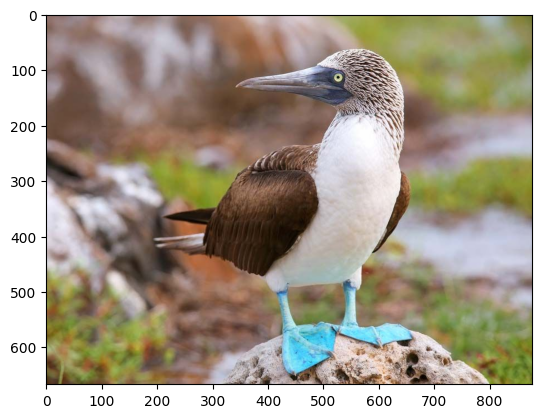

In [166]:
def show(img): # Helper function to check if image can be processed
  plt.imshow(img)

show(img)

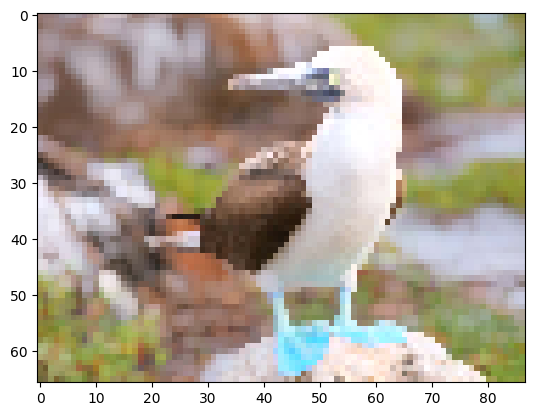

In [169]:
#Down Sampling using Maximum Method
def downsample_max(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  if (new_height == 0 or new_width == 0):
    print("Factor is to high, Can't Down Sample")
    return
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.max(block, axis=(0, 1)) # Find the maximum value for each channel within the block and keep the channels intact.
  return new_img

new_image_max = downsample_max(img, 10)
show(new_image_max)

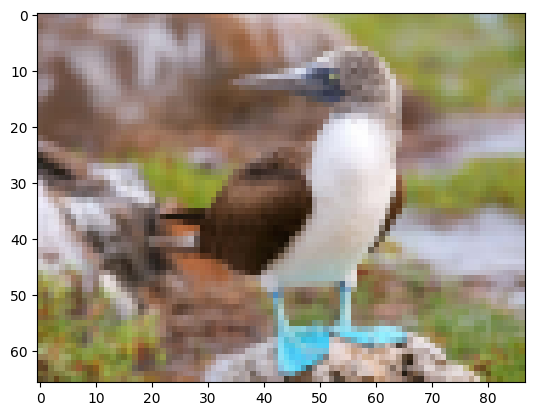

In [168]:
#Down Sampling using Average Method

def downsample_avg(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.average(block, axis=(0, 1)) # Find the average value for each channel within the block and keep the channels intact.
  return new_img

new_image_avg = downsample_avg(img, 10)
show(new_image_avg)

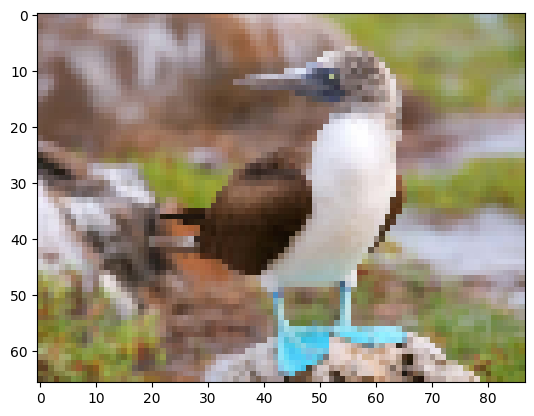

In [170]:
#Down Sampling using Median Method

def downsample_med(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.median(block, axis=(0, 1)) # Find the median value for each channel within the block and keep the channels intact.
  return new_img

new_image_med = downsample_med(img, 10)
show(new_image_med)

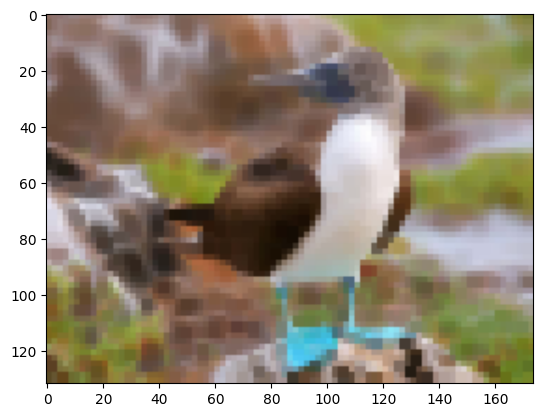

In [173]:
#Up Sampling using Nearest Neighbor Method

def upsample_nn(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
      old_i = i / factor
      old_j = j / factor

      # Get neighbors of the new pixel
      i0, j0 = int(np.floor(old_i)), int(np.floor(old_j))
      i1, j1 = min(i0+1, height-1), min(j0+1, width-1)

      # Collect neighbors into an array
      neighbors = [
        img[i0, j0],
        img[i0, j1],
        img[i1, j0],
        img[i1, j1]
      ]

      # Average neighbors and use the average in the new image
      new_img[i, j] = np.min(neighbors, axis=0)

  return new_img

new_image_nn = upsample_nn(new_image_avg, 2)
show(new_image_nn)

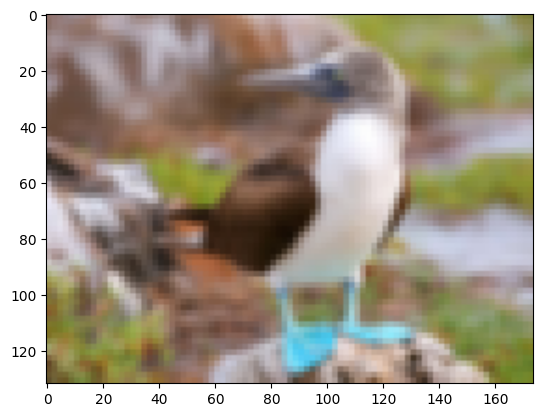

In [179]:
#Up Sampling using Bilinear Method

def upsample_bilinear(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
      old_i = i / factor
      old_j = j / factor

      # Get neighbors of the new pixel
      i0, j0 = int(np.floor(old_i)), int(np.floor(old_j))
      i1, j1 = min(i0+1, height-1), min(j0+1, width-1)

      # Collect neighbors into an array
      neighbors = [
        img[i0, j0],
        img[i0, j1],
        img[i1, j0],
        img[i1, j1]
      ]

      # Average neighbors and use the average in the new image
      new_img[i, j] = np.mean(neighbors, axis=0)

  return new_img

new_image_bilinear = upsample_bilinear(new_image_avg, 2)
show(new_image_bilinear)

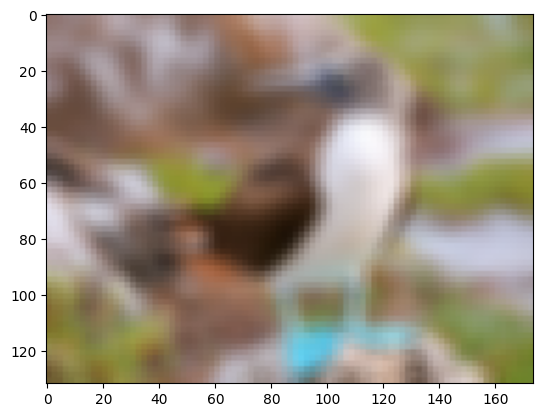

In [177]:
#Up Sampling using Bicubic Method

def upsample_bicubic(img, factor, w1=0.6, w2=0.4):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
        old_i = int(i / factor)
        old_j = int(j / factor)

        # collect inner ring (direct neighbors)
        inner = []
        for x in [-1, 0, 1]:
          for y in [-1, 0, 1]:
            if x == 0 and y == 0: # Don't include center
              continue
            new_i, new_j = old_i + x, old_j + y
            if 0 <= new_i < height and 0 <= new_j < width: #Make sure pixels are not out of bound
              inner.append(img[new_i, new_j]) #Add element of ring to list

        # collect outer ring (pixels 2 steps away)
        outer = []
        for x in [-2, -1, 0, 1, 2]:
          for y in [-2, -1, 0, 1, 2]:
            if abs(x) == 2 or abs(y) == 2:  # outer frame only
              new_i, new_j = old_i + x, old_j + y
              if 0 <= new_i < height and 0 <= new_j < width: #Make sure pixels are not out of bound
                outer.append(img[new_i, new_j])

        # calculate the averages of the inner and outer ring
        avg_inner = np.mean(inner, axis=0) if inner else 0
        avg_outer = np.mean(outer, axis=0) if outer else 0

        # calculate weighted sum
        new_val = w1 * avg_inner + w2 * avg_outer
        new_img[i, j] = new_val

  return new_img

new_image_bicubic = upsample_bicubic(new_image_avg, 2)
show(new_image_bicubic)